In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.io

SMALL_SIZE = 20
MEDIUM_SIZE = 20
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [2]:
MCRES = scipy.io.loadmat('MCRES-ieee_13node_balance.mat')

SS1 = MCRES['SS'][0,:]
EEM1 = MCRES['EEM1'][0,:]
DEM1 = 180/np.pi*MCRES['DEM1'][0,:]
SEM1 = MCRES['SEM1'][0,:]

print(len(SS1))

maxss = 2.0
count = 0
for k1 in range(0,len(SS1)):
    if SS1[k1] <= maxss:
        count+=1

print(count)
SS2 = np.zeros(count)
EEM2 = np.zeros(count)
DEM2 = np.zeros(count)
SEM2 = np.zeros(count)

count = 0
for k1 in range(0,len(SS1)):
    if SS1[k1] <= maxss:
        SS2[count] = SS1[k1]
        EEM2[count] = EEM1[k1]
        DEM2[count] = DEM1[k1]
        SEM2[count] = SEM1[k1]
        count+=1



22500
11338


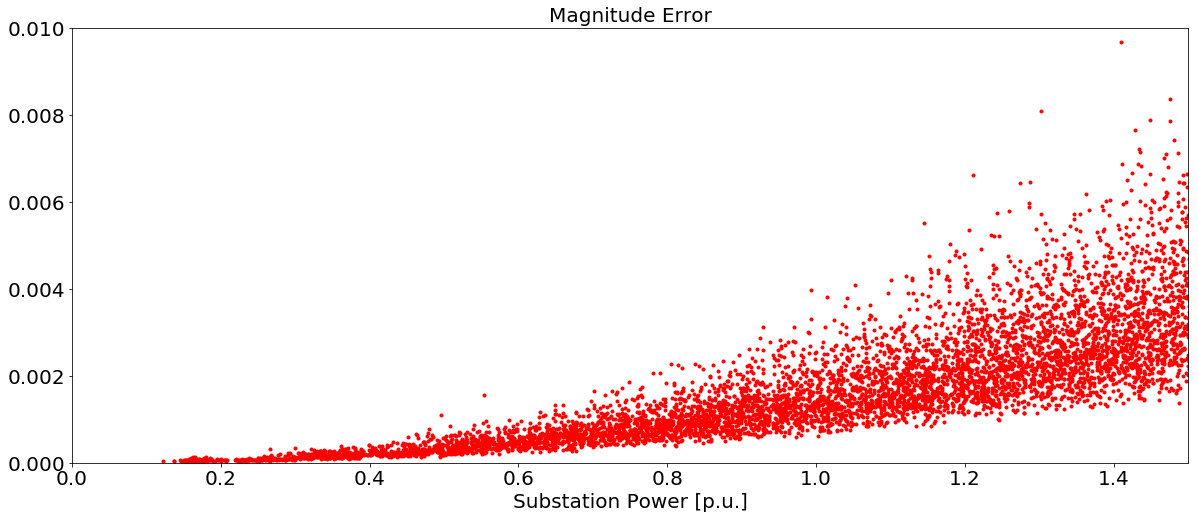

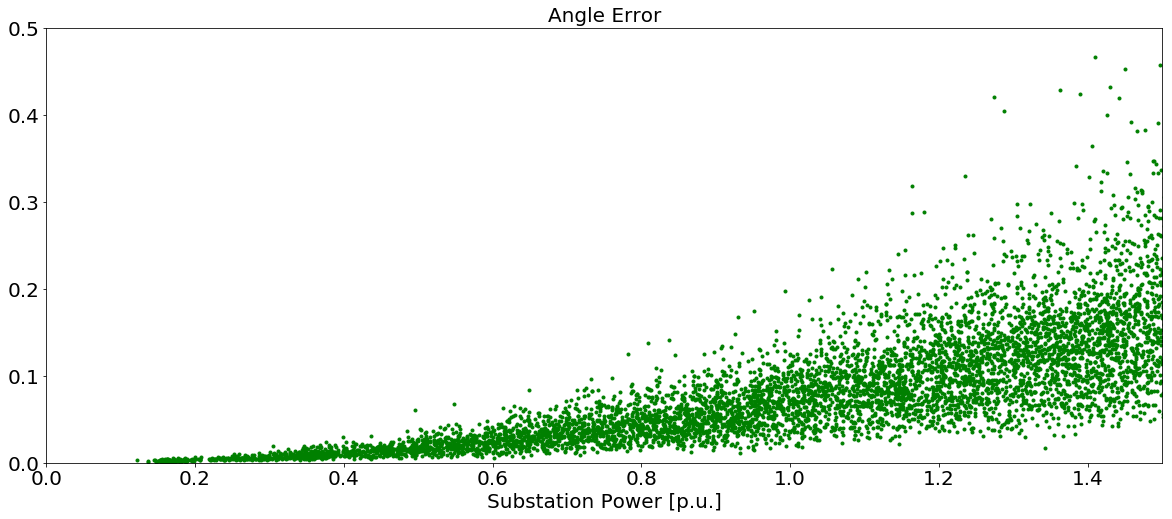

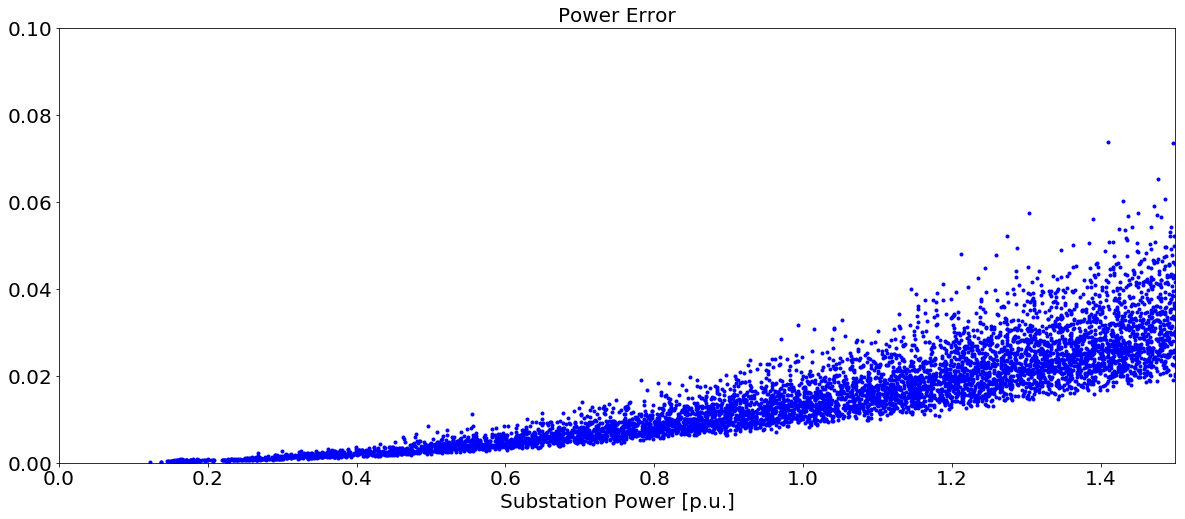

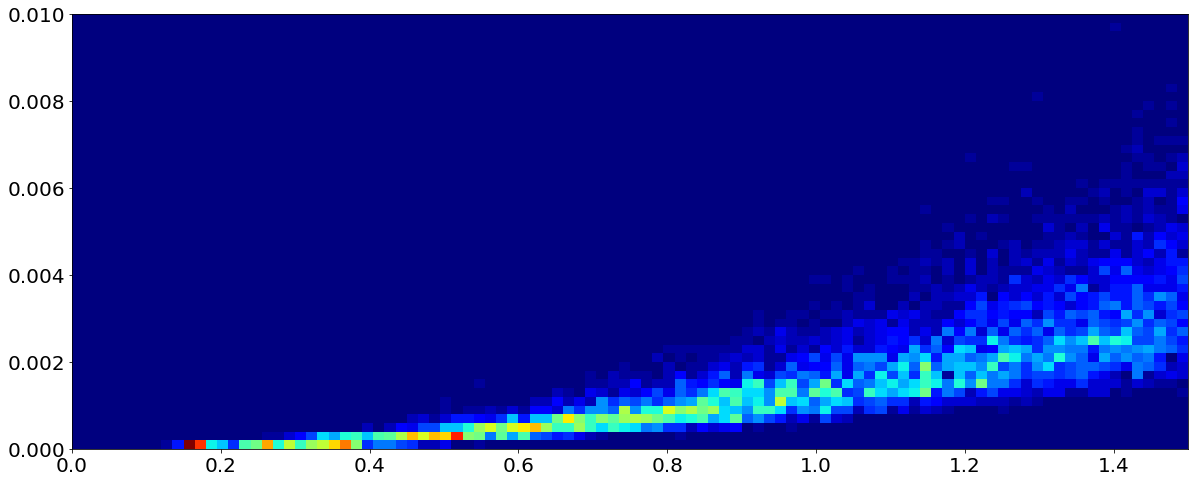

In [3]:
plt.figure(figsize=(20,8), facecolor='w', edgecolor='k')
plt.plot(SS1,EEM1,'r.')
plt.title('Magnitude Error')
plt.xlabel('Substation Power [p.u.]')
plt.xlim(0, 1.5)
plt.ylim(0, 0.01)

plt.figure(figsize=(20,8), facecolor='w', edgecolor='k')
plt.plot(SS1,DEM1,'g.')
plt.title('Angle Error')
plt.xlabel('Substation Power [p.u.]')
plt.xlim(0, 1.5)
plt.ylim(0, 0.5)

plt.figure(figsize=(20,8), facecolor='w', edgecolor='k')
plt.plot(SS1,SEM1,'b.')
plt.title('Power Error')
plt.xlabel('Substation Power [p.u.]')
plt.xlim(0, 1.5)
plt.ylim(0, 0.1)

plt.figure(figsize=(20,8), facecolor='w', edgecolor='k')
plt.hist2d(SS2,EEM2,bins=(100, 50),range=[[0, 1.5],[0, 0.01]], cmap=plt.cm.jet)
plt.xlim(0, 1.5)
plt.ylim(0, 0.01)
#plt.colorbar()

plt.show()

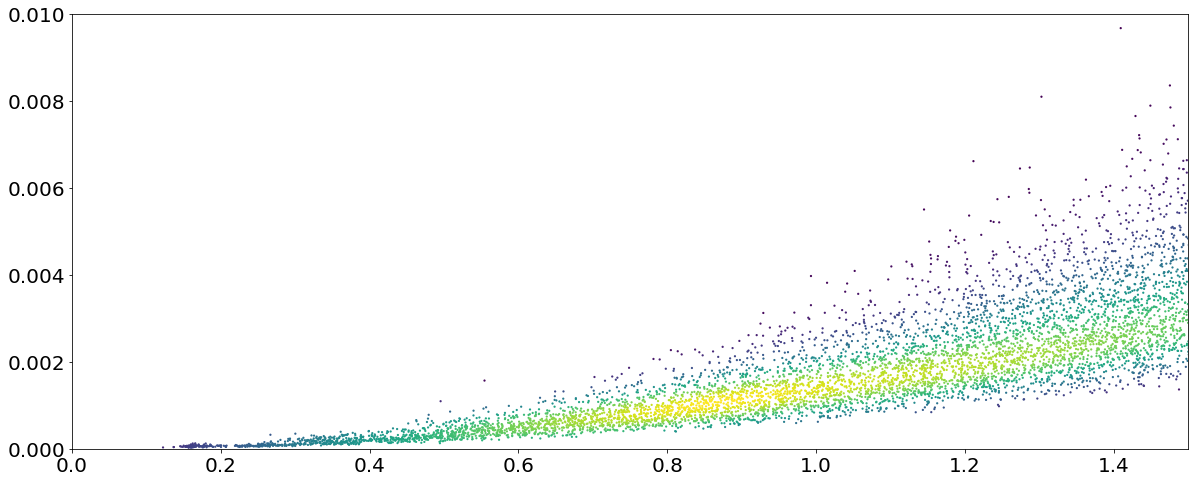

In [4]:
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([SS2,EEM2])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
SS3, EEM3, z = SS2[idx], EEM2[idx], z[idx]

plt.figure(figsize=(20,8), facecolor='w', edgecolor='k')
plt.scatter(SS3, EEM3, c=z, s=5, edgecolor='')
plt.xlim(0, 1.5)
plt.ylim(0, 0.01)
#plt.savefig('magerror.pdf', bbox_inches='tight')

plt.show()

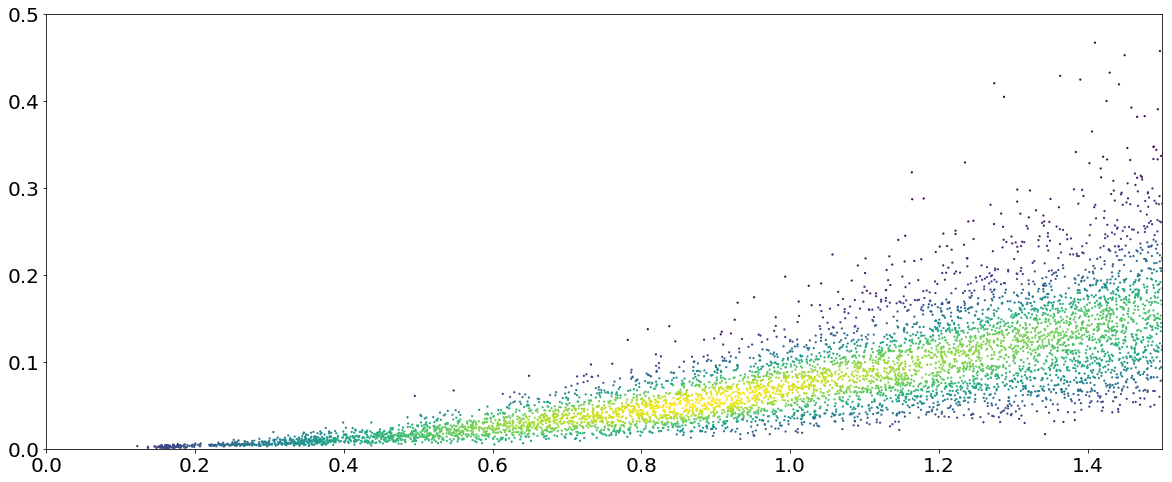

In [8]:
# Calculate the point density
xy = np.vstack([SS2,DEM2])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
SS3, DEM3, z = SS2[idx], DEM2[idx], z[idx]

plt.figure(figsize=(20,8), facecolor='w', edgecolor='k')
plt.scatter(SS3, DEM3, c=z, s=5, edgecolor='')
plt.xlim(0, 1.5)
plt.ylim(0, 0.5)

plt.show()

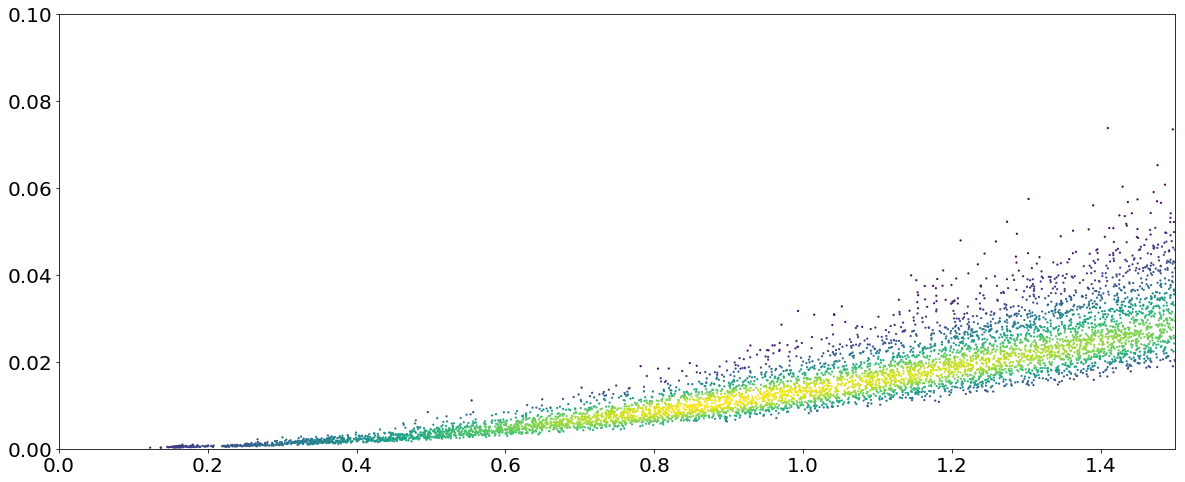

In [6]:
# Calculate the point density
xy = np.vstack([SS2,SEM2])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
SS3, SEM3, z = SS2[idx], SEM2[idx], z[idx]

plt.figure(figsize=(20,8), facecolor='w', edgecolor='k')
plt.scatter(SS3, SEM3, c=z, s=5, edgecolor='')
plt.xlim(0, 1.5)
plt.ylim(0, 0.1)

plt.show()

In [15]:
print(np.max(SS3))

1.9998449233164477
